<a href="https://colab.research.google.com/github/wiredastronaut/stableDiffusion/blob/main/Diffusion/Probabilistic-Models/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import random
import numpy as np

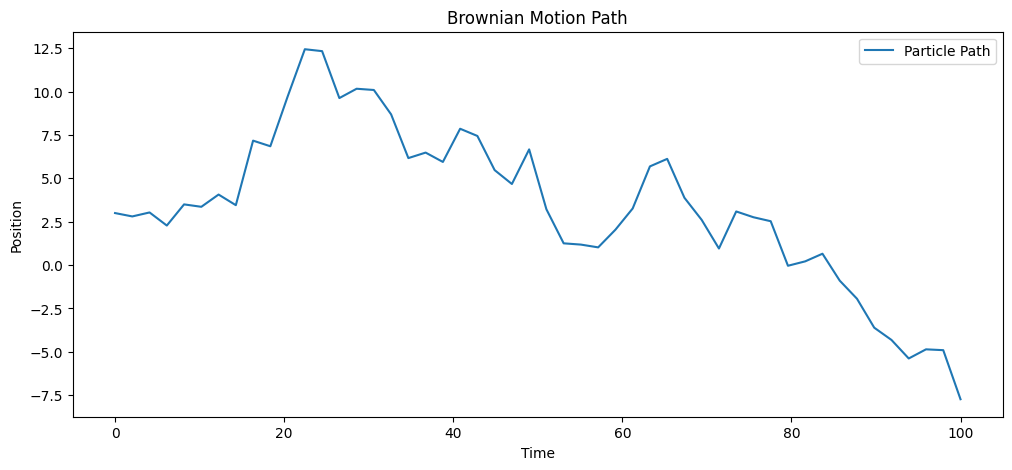

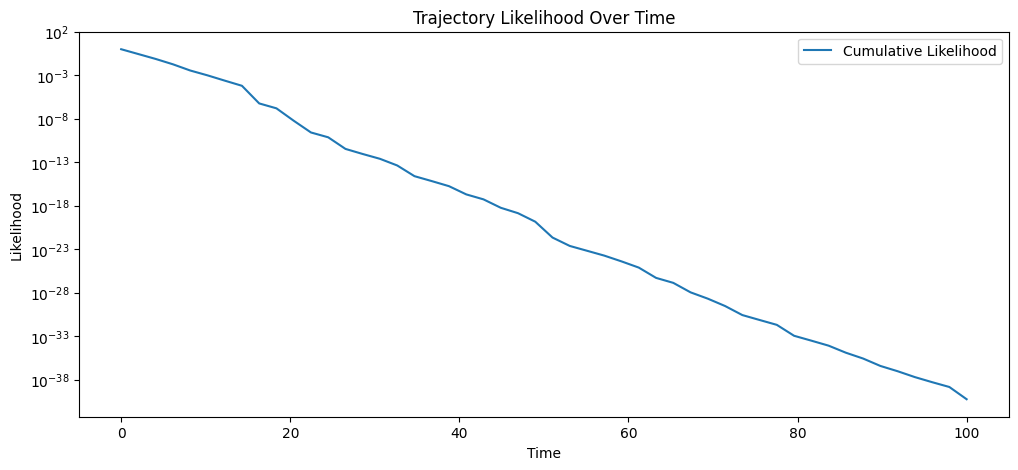

In [2]:
## Forward Diffusion
T = 100 # diffusion steps
#Forward diffusion Kernel (App 1) defined as
# NormalDist at x^t, w/mean = x^(t-1) * sqrt(1 - beta_t) w/ sigma = identity * beta



## Basic Brownian Motion and Diffusion: https://math.nyu.edu/~goodman/teaching/StochCalc2018/notes/Lesson1.pdf
'''
So refresh my memory - why is the following an example of brownian motion? And what is brownian motion

The example I continually come across is if particles in water were observed to move
in a random way. Where a given path consists of a series of state transitions that occur
with a given probability. Essentially if a particle's path is exhibiting brownian motion it will
seem to move randomly over time. Specifically brownian motion is captured with 3 main properties
1. The path the particle takes is continuous (ie. not discrete jumps)
2. The positional step from one time to the next is zero mean and the varinance is
proportional to time (longer time = longer step)
3. The process is a markovian process.

A markovian process means the state change from time 1 to time 2 is dependent only on
the current state at time 1. In a general way this means the future is only dependent
on the present, not the past.

Brownian motion is essentially a good example of diffusion which is why I'm focusing
on it here. It serves as a basic example of how motion can move.




Defining the probability function of the diffusion process for Brownian motion.

- So property 2 states that the positional step from one time to the next of a particle (given by
a time delta of t) is zero mean, and the variance is based on the time delta, t. Thus the
probability density function can be given using the gaussian function.

u(x, t) = 1/(2*pi*t)*exp(-x^2/(2*t))

(You can see there's that mu, which normally shows up, is non-existent or zero. And t, is the variance term which controls
the size of the gaussian)

In the below code we actually randomly sample from the above distribution. So we can use
the above formula to say what the probability of x being a specific value (like 2) for example is.
With x being the step from one point to another. So in the below code we have the
formula for going from position y to position x (ie. a step sampled via the gaussian). We then
use that step value, formulate the probability density function, and identify the probability
associated with getting the specific step value, with the given time.

Heat equation (or forward equation)

partial w.r.t. t of u = 1/2 * partial w.r.t. x sqaured of u

It is called the heat equation as this partial differential equation can be solved
to show how heat is transferred through a body at each step in time. You can check this 
https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a, webpage
for graphics and explanation on the heat equation. 

At a more general level this equation allows us to describe how diffusion occurs at each step in time.

We can derive the diffusion function of our brownian motion ourselves to see if it will fit within the heat equation. Getting back to our
particle in motion, the initial state, X0 has a PDF of u0(y). Meaning there will be some probability associated
with y being X0 (say y = 2), and it's equal to u0. Then the probability that the state goes from y to x over a time delta of t
is given by the gaiussian in equation 9. Then the probability of xt = Xt (ie. being some specific value), is given by

u(x, t) = integral over initial_prob(initial_state) * Gaussian(to_state, current_state, ttime) dy

Th integral piece captures all the potential initial states. If you put u in the heat equation, it
actually satisfies the equality. What this is literally showing is going from step 0 to 1 and the probability associated with that. 

Insert foralized_plot_no_legend_blue ehre and explain how this demonstrates sampling from the gaussian and it
relating to the equation. 

Bayes rule is used due to the conditional nature of the probability. The initial distribution is sampled to get a value for y, this carries with
it the initial probability of u0. Based on this result, the value of x at the next step (or time t) can change. This is why
we use Bayes rule. Using the fact we are now moving from a value of y to x in the next step we're able to derive the next probability
density function. Combining those two with Bayes rule allows us to construct the integral of equation 10 (above). 

Top plot: Initial distribution, we sample the red line with value y. This carries with it the probability of u0(y).
Bottom plot: Now we take the sampled value to inform the next distribution; in fact it's the mean of the next distribution (since we 
start from  so a step of 0 would leave our particle at the same position it started at). 

Essentially, we use Bayes rule to understand the overall probability of having our state
be a value of x at time t. We get here by sampling an initial distribution u0 to get y, then we take the y value (ie. the value
of our state at t = 0) and sample on the next distribution that captures going from y to x with a given time delta of t. 

Apply this to multiple steps through the diffusion process and you get multiple_gaussians_no_labels. And you also get the 
gif. Over time we start to see the brownian motion. See below for the trajectory of a single particle and the associated probability.

Motion

Probability
Caption: Each step that the particle takes has some probabilty associated with it. The more steps that are taken the less and less 
likely that the specific trajectory shown becomes. 

The code below shows how to generate that.


Next, I'm in lecture 1 near equation 11 moving to backward equation.





'''
ts = np.linspace(0, 100, 50)
# Distribution

initial_position = 3
position_t = []
density_t = []
density_t.append(1)
position_t.append(initial_position)
for i in range(1, len(ts)):
  t1 = ts[i-1]
  t2 = ts[i]
  #Randomly sample from the zero mean gaussian to get a position step
  position_step = random.gauss(0, np.sqrt(t2 - t1))

  #Property 2, positional step are gaussian of zero mean and variance according to the timestep
  new_position = position_t[-1] + position_step
  #Find the transition probability From y to x
  y = position_t[-1]
  x = new_position
  transition_density = 1/(np.sqrt(2 * np.pi * (t2 - t1))) * np.exp(-((x - y)**2)/(2 * (t2 - t1)))

  #Property 3, the motion is markov based (ie. only dependent on current position)
  position_t.append(new_position)
  #Probability of observing x given y = p(y) * p(x|y)
  density_t.append(density_t[-1] * transition_density)

plt.figure(figsize=(12, 5))
plt.plot(ts, position_t, label="Particle Path")
plt.title("Brownian Motion Path")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

# Plot likelihood evolution
plt.figure(figsize=(12, 5))
plt.plot(ts, density_t, label="Cumulative Likelihood")
plt.title("Trajectory Likelihood Over Time")
plt.xlabel("Time")
plt.ylabel("Likelihood")
plt.yscale("log")  # Log scale for better visualization of decreasing likelihood
plt.legend()
plt.show()

## Going backward - But this probably should not be used....
A value function is going to be some function of the position of the particle at a final time T. Specifically,
it's really the expectation on that value function given some earlier value of the position. The value function can
be re-formulated by saying if we have some function of the position, say V(x), if we weight that according to the 
distribution that goes from y to x (ie. our gaussian probabilty function), and integrate over everything y could possibly be, 
then that should be the expected value of V(x) at that time. 

How expectation factors into probability: 
Essentially, if you have a function that gives some sort of value for a given position of the particle. And if the particle is at position x, 
and y can be 5 different things and each different things, to get the expected value out you would average the values of the function for
each potential y value. 

Note: The forward transition density going from y to x is used in the forward process, but can also be used in the backward process. 

The long and short is that the value function gets formulated by multiplying the transition density that goes from state x to state y by all the values
that future states could take. As it turns out this formulation is actually a solution to the backward equation (or Kolmogorov equation). What this really means
is that the formulation as given in euqation 7, allows us to express backward diffusion as long as we have a value function. 


See the last paragraphs near page 7; forward basically shows how u changes as time moves forward. 

The backward is teh reverse. Basically the value function satisifes a final condition (ie. V(x)) The value function evolves backwards in time from its given final condition. So we start from T and move to t. 

In reference to reverse diffusion: Now if you reverse the direction x to y is actually moving backward towards the clean distribution. That is
what is represented by V(y) - it's the ideal distribution after the backwards diffusion. f(x, T) is the initial conditions for the reverse process, which is the 
 final noisy distribution from the forward process. Start at f(x, T) and go back to x0. 





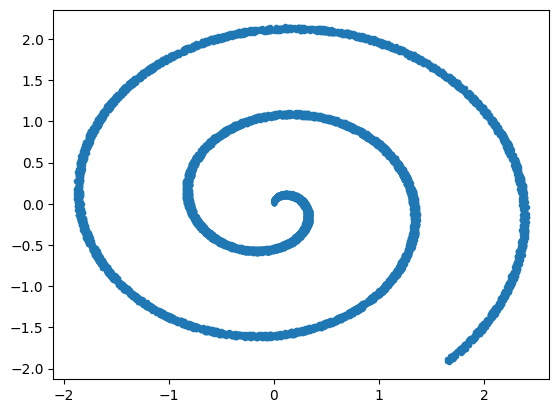

In [3]:
# NOw move on to the swiss roll distribution
# set parameters
length_phi = 15   #length of swiss roll in angular direction
sigma = 0.3  #noise strength
m = 10000     #number of samples
#create the dataset
phi = length_phi * np.random.rand(m)
xi = np.random.rand(m)
X = 1./6*(phi + sigma*xi)*np.sin(phi)
Y = 1./6*(phi + sigma*xi)*np.cos(phi)
swiss_roll = np.array([X, Y]).transpose()
# now display
plt.scatter(X, Y, marker=".")


## Forward Process

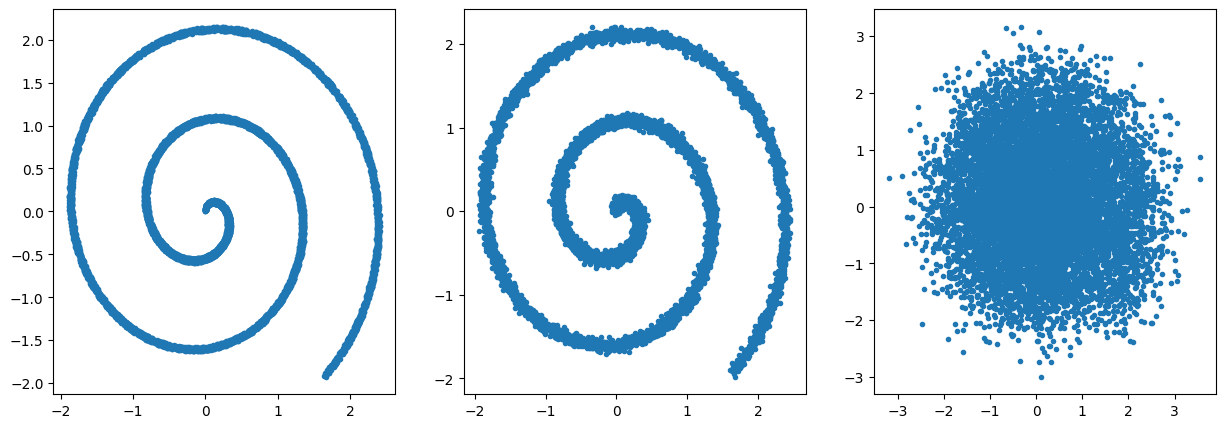

In [4]:
#We want to essentially add noise at T timesteps according to the kernel

#Beta (diffusion rate) - will step at a constant rate
T = 40

beta = np.linspace(0.001, .01, T)
#betas = torch.linspace(1e-4, .01, steps=T, device=device)




def transition_kernel(beta, x_minus_1_in):
  """
  Simulates the forward diffusion process. x_minus_1_in is the initial data
  beta is the current beta

  """
  if len(x_minus_1_in.shape) < 2:
    x_minus_1 = np.reshape(x_minus_1_in, [x_minus_1_in.shape[0], 1])
  mu = x_minus_1 * np.sqrt(1 - beta)
  cov = np.eye(x_minus_1.shape[0]) * beta
  x_1 = np.zeros((x_minus_1.shape[0], 1))

  #Sample in uniform distribtuion which will then be offset by the new calculated mu
  #and scaled by the new standard deviation.
  for i in range(0, x_minus_1.shape[0]):
    x_1[i, 0] = random.gauss(0, 1)
  
  sampled_value = mu + np.sqrt(cov) @ x_1 #<- this is the same way it's added above, just implementation details....
  #Returns the probability associated with x_1 of the distribution
  #formed with x_minus_1, and beta (see paper)
  if beta > 0:
    probability =  (2 * np.pi)**(-x_1.shape[0]/2) * (np.linalg.det(cov))**(-.5) * np.exp(
        -.5 * (x_1 - mu).transpose() @ np.linalg.inv(cov) @ (x_1 - mu)
      )
  else:
    probability = np.ones((mu.shape))


  return (sampled_value, probability)


XY = np.vstack((X, Y))
XY_new = np.zeros((XY.shape))
XY_arr = []
XY_arr.append(XY)
for t in range(0, T):
  XY_new = np.zeros((XY.shape))
  for i in range(0, XY.shape[1]):
    xy_new, newP = transition_kernel(beta[t], XY[:, i])
    XY_new[:, i] = xy_new[:, 0]
  XY_arr.append(XY_new)
  XY = XY_new




#This shows how with a specific beta we go to a clean distribution to a noisy one.
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
XY = XY_arr[0]
ax.scatter(XY[0,:], XY[1,:], marker=".")

ax = fig.add_subplot(132)
XY = XY_arr[1]
ax.scatter(XY[0,:], XY[1,:], marker=".")

ax = fig.add_subplot(133)
XY = XY_arr[-1]
ax.scatter(XY[0,:], XY[1,:], marker=".")

## Backwards
Let's say we have some function of the data, V(x). We can get the expected value of that function easily:
f(x) = E[V(x)] = V(x)

Now if we have some brownian motion and we're moving from state x to y, then we may want the expectation of
V(y) (ie. at some later time). This is given by the conditional:
f(x, t) = E[V(XT) | Xt = x], where XT is y or the later value

Now IF in the above, t < T (ie. our conditional is from an earlier time and not the other way around), we satisfy the backward
PDE. 

CAN DEFINE HERE

So if you have some final condition your arbitrary function has some final value. This is where t = T, so there's no real prior condition.

f(x, t) = E[V(XT) | XT = x] -> f(x, T) = E[V(x)] = V(x)

For brownian motion the above conditional expectation can be expanded to equation 7 in Week3.pdf (https://math.nyu.edu/~goodman/teaching/StochCalc2021/week3/Week3.pdf)

In this equation we have the final value, at time = T of V(y). This sets the boundary condition of the PDE. Within the integral the final value gets weighed by the transition density that describes moving from x to y. Now this is the same as the transition density for going from y to x which is what we're really after.  So as we move from T to t to 0 we'll slowly move away from the final value consistent with brownian motion. 


A note on using the same transition density for forward AND backward. Basically the forward and backward PDEs both have the same fundamental solution which is that 
gaussian solution. High-level it's because the PDE operator that's used is symmetric. Thus whether it's forward or backward it's a similar PDE but with different
boundary conditions. We either start with some potential inital values and diffuse from there, or we start with the boundary conditions at the end and diffuse
backward. 

### Reverse Diffusion
We saw in the forward diffusion basically each particle goes through it's own brownian motion or more generally it's diffusion through gaussian motion. Now if the motion frame to frame of the particles (or the time difference between frames) is small enough then the forward and reverse processes should be the same. This means that we can model  the exact reverse process. 

In the above we generalized the reverse process for brownian motion. If this was to continue it would have shwon a gradual changing from the final value consistent with brownain motion. Instead of following simple brownian motion in the backwards process the plan is to instead learn the bacwards process by teaching a neural network the learning schedule. This means it will learn the means and covariances (along with beta) through each step of the reverse process. If the loss function that's optimized against is to rectify an original signal (or image) we can learn the right schedule to recreate the same image. 






In [5]:
import torch
import numpy as np

# Application to Stable Diffusion
## Forward
In Deep Unsupervised Learning using Nonequilibirum Thermodynaics you see equation 1 which describes the application of the transition kernel. In the brownian motion case we saw the same formula (as equation 10 in https://math.nyu.edu/~goodman/teaching/StochCalc2018/notes/Lesson1.pdf). Essentially this says starting from some initial distribution u0 or pi(y'), repeatedly applying the Markov diffusion kernel we're able to slowly move to a distribution that is a little easier to work with. The pi(y') is the original image, or original swiss roll, and the pi(y) would be a simple gaussian distribution. The integral is there to indicate summing across all posible starting states, y'. It's more likely that y' is somewhere near y, but it's still integrated across (weighted by the transition kernel which gives the closer y' was to y, the more likely the transition -> higher probability). 

Equation 2 describes one step of the gaussian kernel. Equation 3 is the repeated application of this. The appendix gives exactly what this looks like for the gaussian kernel case. 
## Backward (For the most part referencing arxiv so q is the back distribution, not p as in the paper)
In both brownian motion and in this paper we move from a final state. This was V(x) before, but now it's characterized by a final distribution. q(xt) in lecture notes (the axiv ones), and p(x(t)) in the paper. See equation 4 for the final state condition in the paper, but essentially it says the final state is a perfectly noised up distribution. Now we need to udnerstand how to get back to the original image. 

In a perfect world we'd go from p_prior (the final noised up distribution) to p_complex (the initial signal, like image) by just sampling each distribution along the way. Much like we were able to do on the way forward. From our forward process we really only have access to the distribution q(xt | xt-1). We can try to expand the Bayes rule, but the long story short is that q(xt-1 | xt) is not able to be calculated. q(xt-1 | xt) is essentially a previous distribution in time, and the key to undoing the forward diffusion. The main reason we can't calculate q(xt-1|xt) is because we don't know q(x0) and it really isn't a gaussian distribution, it is a distribution representing some complex signal. 

Bayes rule formulation:

q(xt-1|xt) = q(xt|xt-1) | q(xt-1) / q(xt), expands to a larger method when we don't have the other terms of the bayes (we can look at arxiv for more info).



In the brownian motion case we didn't really bother figuring out u0, because going backwards in a purely gaussian manner would not end in a complex distribution, but instead a more gaussian like distribution.

However, since we have some training data available we have an approximation of the complex distribution. This can be used to fill in the q(x0). Now we transition from notation of qs to ps since our p is based on the training data which will approximate q. So in diffusion the reverse process must have a similar form to the forward process (Feller, 1949 said that I guess) which means just like the forward, we can step backward by using the same gaussians. The basic intuition here is that if particles are moving in small enough manner (or diffusion is occuring on a small scale) the gaussian motion is symmetrical a particle can be going left or right for a backwards time step or a forwards one. THis is the same process as the brownian motion diffusion, where we are applying a gaussian transition desntiy (kernel) to get an estimate of some function at some previous time. We will be doing the same thing to get an idea of what the perfectly noisy distribution at the final time T looked like at a previous time before it was the 'perfect gaussian distribution'. The difference to the brownian motion case is that we have a neural network to generate each intermmeidate distribution by learning the mean and sigma for each timestep. For a specific transition desnity (or step), the network would learn p(xt-1 | xt) by learning the mean and variance.

I did have the question of why can't we just use the same forward distributions that we applied on the way back. I think this connected for me when I thought about the original data being a picture of a dog. On the forward the features of the dog will slowly be overwritten by noise until it looks grainy and unrecognizable. In short, the information is gone. We can apply the same random noise that we did but in reverse and we'll succeed in removing the random noise, but the information of the dog is gone. So we can bring that information back, by having the neural network learn the features of a dog and express that as a mean and sigma of a specific gaussian distribution to recover that.

## Training and Loss
Remember what we're learning:

Put equation 12 from arxiv. 

Im training our model the best case scenario is for us to maximize the probability of the original distribution, ie. maximize p(x0). However to go from xT (final state) to x0 there could be a lot of differente trajectories that all would need to be accounted for in the calculation of p(x0). We can see this in equation 14 of the arxiv lecture notes, or eq. 6 of the paper. So to fix this issue we do some fancy math that has it's origins in Variational Autoencoders (VAEs). 

IN VAEs the goal is to maximize the Evidence Lower Bound (ELBO). This is the lower bound on log(p(x)), in our case this would be the log liklihood of the probability of p(x0). Basically:

logp(x) > ELBO s.t. maximizing ELBO maximizes the logp(x)

Additionally logp(x) = ELBO + KL_divergence, so if the goal is to maximize the ELBO -> we can achieive this by also minimizing the KL_divergence. It's a little more complex than this, but largely ELBO and KL divergence sum to a constant meaning we can minimize KL divergence to maximize ELBO. The KL divergence is a term that is large when two distributions are singificantly different and small when they are identical and overlaping. You can imagine why this would be helpful when we want the end distribution to look a specific way!


In theory everything is working correctly if sampling from the reverse distribution gives values similar to the forward distribution for the corresponding time. We can see this in figure 6b of arxiv of the overlapping distribution.

## KL Divergence
The KL divergence is used in the training process to enforce the reverse distribution to look like the forward distribution. Most of the arrxiv section 2.3.4 was taking the definition of the ELBO and creating a true loss function involving KL divergence AND making sure that the forward and backward distributions can be compared appropriately (ie. at the same time). (Basically the forward process gets reversed so it can be compared to the backward one). We get two a KL divergence expression for two multivariate gaussians (which we have) in equation 27. The gist is that using this loss function forces p distribution to look like the q one (which is conditioned on the original distribution of x0).



## Stick to the 'code'
Let's talk about a specific example, if we wanted to generate the swiss roll distribution, where a spiral shape is given when a series of coordinates <x,y> are plotted in the X-Y plane, then the original perfect 'signal' is the swiss roll and the noised up piece (ie. at the final time T), is a perfect gaussian. In a perfectly trained network, the inputs to the network would be a sample from the gaussian distribution, so some coordinate that falls within an XY gaussian, and then the final time T. The output would then be the mean and variance of the previous time's distribution, ie. the somewhat less noisy gaussian associated to time T - 1. Now if we continue this trend we can get all the way back to the original signal by repeatedly, sampling among the distribution, passing in the input along with decrementing the time, and getting out the next/previous distribution. 

### The neural network
The network archietcture iself consists of a single linear layer followed by two heads. One for the mean and one for the variance prediction. In the first layer, the inputs <x, y, t> from a sampled point of a distribution associated with time t, are mulitplied in a mx + b (ie. linear) way. Specifically,

layer_output = W * <x, y, t> + b

W: is the weight matrix of size 16 x 3
b: is a vector of 16 values. 

16 is simply the size of the first layer. The layer_output is the output of size 16x1. Furthermore the output is passed through a non-linear activiation function called ReLU. This is used to create a more stable gradient calculation, but also to introduce non-linearities into the solution. Since we're trying to uncover a signal from raw noise there is a strong expectation the prediction will NOT be linear. The mean layer is made up of 128 (nominally) nodes and performs a similar calculation to the equation above. After the mean head you have 128 outputs going to two nodes representing the x and y mean. The x-mean node will have it's own weight matrix, W, of size 128 x 1 and a bias value, b, of size 1. The dimenstionality of the y-mean node will be the same. The output of this head will be the x and y mean of the next distribution, previous in time. For example, if we started at t = 1, then the output would be a predicted x and y value from the original swiss roll distribution. Notice, there's no ReLU. If we did that we' wouldn't be capable of getting a mean below 0. So we stick to the raw linear output.

The same thing is repeated for the variance head. It has an output that represents the variance on a point, so both in x and y, from the next distribution (or previous in time). THe difference here is the output of the variance is passed through a sigmoid activation function which limits the output from 0 to 1. This is because we are predicting the log variance instead of the standard variance. The sigmoid is also specified in the paper Deep whatever. blah.

### Loss function: Simplified KL Divergence
The main point of the KL divergence is to understand how different two distributions are. A high score (close to 1) for distributions that DON't align well and a low score for those that DO. A simplified KL divergence was created, but looks to first align the mean and the align the variance. Specifically 

mean_loss = (mu_true - mu_est)^2 / sigma_est^2 - this is the difference in means. If the variance is high, this will bring the loss globally, this gets to the fact that there's likely some overlap of the two distributions with a larger bell curve as specified by the larger variace. Similarly if the variance is small this will make the loss more sensitive to the difference in means. That is because the bell curve is more narrow and less enveloping.

The variance loss comes from this defintion (https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians), but basically consists of two parts
variance_loss = log_var_est - log_var_true + var_est/var_true - 1
Scalar difference:
    - log_var_est - log_var_true is simple, the more different the higher the value (more loss).
Ratio:
    - var_est/var_true - 1 will be close to 0 as well when distributions are nearly the same.

The two help with the reconciling two facts though. If log_var_est is 1000 and log_var_true 900, the loss from the ratio piece will be .1, not that high, when maybe it should be as there is a large difference. The scalar piece makes sure to include the loss incurred because of the magnitude of the values. Similarly if we're dealing with small differences, .01 vs. .007, the scalar difference will not show much loss when on smaller scales when it probably should. The ratio piece will show a larger loss in this case still creating accurate loss. These two work together to balance the trade-off as the variance changes magnitudes. The scalar difference handles absolute shifts well, and the ratio term handles proportional differences.


In [6]:
import torch.nn as nn

import torch
import torch.nn as nn
#Check GPU
if torch.cuda.is_available():
    print("GPU Available: ", torch.cuda.get_device_name(0))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

GPU Available:  NVIDIA GeForce RTX 3060
cuda


In [7]:
def true_posterior(alphas, betas, x0, xt, idx):
  '''
    See equation 10 in arxiv for alphas defn
    This is the output of the q distribution. Basically this is the forward noise adding path
    that this corresponds to. As far as training goes, this is the 'truth'. Since we're trying to get the backwards distribution to 
    match the forwards, we need to define the forward. THis is q(xt|x0)

  '''
  #WAS
  #mu = (torch.sqrt(1 - betas[idx]) * alphas[idx-1]/alphas[idx] * x0) + (torch.sqrt(betas[idx]) * (1 - alphas[idx-1])/alphas[idx] * xt)
  #variance = (1 - alphas[idx-1]) * betas[idx]/alphas[idx]
  #The alpha coming in has a bar over it, meaning it's the cumulative multiplication of alpha (no bar) which = 1 - beta[idx]
                 
  mu = ((torch.sqrt(alphas[idx-1]) * betas[idx])/(1 - alphas[idx]) * x0) + (torch.sqrt(1-betas[idx]) * (1 - alphas[idx-1])/(1 - alphas[idx])) * xt
  print(f"idx = {idx} alphas[idx-1] = {alphas[idx-1]} betas[idx-1] = {betas[idx-1]} alphas[idx] = {alphas[idx]} betas[idx] = {betas[idx]}")
  #print(f"x0 coeff = {torch.mean(torch.sqrt(alphas[idx-1]) * betas[idx])/(1 - alphas[idx])}")
  #print(f"x0 mean = {torch.mean(x0)}")
  #print(f"xt coeff = {(torch.sqrt(1-betas[idx]) * (1 - alphas[idx-1])/(1 - alphas[idx]))}")
  #print(f"xt mean = {torch.mean(xt)}")
  beta_hat = (1 - alphas[idx-1]) * betas[idx]/(1 - alphas[idx])
  print(f"beta_hat is {beta_hat}")


  #variance = variance*torch.randn_like(mu, device=device)
  variance = torch.full_like(mu, beta_hat.item)
  
  return (mu, variance, beta_hat)
  


In [11]:


class ReverseDiffusionNetwork(nn.Module):
    def __init__(self, input_dim, time_dim, hidden_dim=128, num_layers=3):
        """
        Neural network for approximating the reverse mean (mu_theta).
        Args:
            input_dim: Dimensionality of x_t.
            time_dim: Dimensionality of the time embedding.
            hidden_dim: Number of hidden units per layer.
            num_layers: Number of layers in the network.
        """

        #Base class
        super().__init__()

        # Define layers
        layers = []
        input_size = input_dim + time_dim  # x_t + time embedding as input
        for _ in range(num_layers):
            #fully connected layer
            layers.append(nn.Linear(input_size, hidden_dim))
            #add activation function
            layers.append(nn.ReLU())
            input_size = hidden_dim

        self.shared_layers = nn.Sequential(*layers)
        #Make the layers sequential
        #* -> that expands the individual layers so they can be taken as argumnets


        # Define separate heads for mean and log-variance
        self.mean_head = nn.Linear(hidden_dim, input_dim)  # Predict mu_theta
        self.logvar_head = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),  # Linear transformation
            nn.Sigmoid()                       # Apply sigmoid activation
        )
    def forward(self, x_t, t):
        # The inputs the sample at the given time, ie. x_t, and then the correpsonding time. The time piece
        # allows us to account for the learning schedule (ie. beta getting bigger/smaller through time)


        """
        Forward pass through the network. ie. not going forward in difusion, but going through the network to train it (confusing on a glance)
        Args:
            x_t: Noisy data at time t (batch_size, input_dim).
            t: Scalar time index (batch_size, time_dim).
        Returns:
            mu_theta: Predicted mean (batch_size, input_dim).
            log_sigma_theta: Predicted log-variance (batch_size, input_dim).
        """
        #next(self.parameters()):
        # retrieves the first parameter of the network. This let's us get the data type of it to 
        # ensure x_t is the correct data type
        x_t = x_t.to(next(self.parameters()).dtype)
        t = t.to(next(self.parameters()).dtype)

        # Combine x_t and time embedding
        input_data = torch.cat([x_t, t], dim=-1)
        shared_output = self.shared_layers(input_data)

        # Compute mean and log-variance
        mu_theta = self.mean_head(shared_output)
        log_sigma_theta = self.logvar_head(shared_output)

        return mu_theta, log_sigma_theta



In [12]:
def kl_divergence(true_mu, est_mu, log_true_var, log_est_var):
  
  est_var = torch.exp(log_est_var)
  true_var = torch.exp(log_true_var)
  assert true_var.shape == est_var.shape, "true_var and est_var must have the same shape!"
  assert log_true_var.shape == log_est_var.shape, "log_true_var and log_est_var must have the same shape!"

  #true_var = torch.clamp(true_var, min=1e-8, max=1e2)
  #est_var = torch.clamp(est_var, min=1e-8, max=1e2)

  mean_loss = torch.sum((true_mu - est_mu) ** 2/ est_var, dim = 1)

  var_loss = torch.sum(log_est_var - log_true_var + (true_var / est_var) - 1, dim=1)
  print(f"true_var mean: {true_var.mean().item()}, est_var mean: {est_var.mean().item()}")
  print(f"true_mu mean: {true_mu.mean().item()}, est_mu mean: {est_mu.mean().item()}")
  print(f"average of loss  {torch.mean(mean_loss)}, max of loss {torch.max(mean_loss)}, min of loss {torch.min(mean_loss)}")
  print(f"average of var loss  {torch.mean(var_loss)}, max of loss {torch.max(var_loss)}, min of loss {torch.min(var_loss)}")
  return torch.mean(0.5*(mean_loss + var_loss))
  


In [85]:
def kl_divergence_eq27(alphas, betas, x0, x_t_true, x_t_pred, idx):
    #print(f"idx = {idx} alphas[idx-1] = {alphas[idx-1]} betas[idx-1] = {betas[idx-1]} alphas[idx] = {alphas[idx]} betas[idx] = {betas[idx]}")
    #print(f"x0 coeff = {torch.mean(torch.sqrt(alphas[idx-1]) * betas[idx])/(1 - alphas[idx])}")
    #print(f"x0 mean = {torch.mean(x0)}")
    #print(f"xt coeff = {(torch.sqrt(1-betas[idx]) * (1 - alphas[idx-1])/(1 - alphas[idx]))}")
    #print(f"xt mean = {torch.mean(xt)}")
    
    
    alpha = 1 - betas[idx]
    beta_hat = (1 - alphas[idx-1]) * betas[idx]/(1 - alphas[idx])
    mu_q = x_t_true
    mu_p = x_t_pred
    #print(f"beta hat = {beta_hat}, mu_q = {torch.mean(mu_q)}, mu_p = {torch.mean(mu_p)}")
    l2_norm = torch.sum((mu_q - mu_p)**2)
    ##if torch.isnan(beta_hat).any() or torch.isinf(beta_hat).any():
    #    print("beta_hat contains NaN or Inf!")
    #if torch.isnan(l2_norm).any() or torch.isinf(l2_norm).any():
    #    print("l2_norm contains NaN or Inf!")
    loss = 1/(2 * beta_hat) * l2_norm
    return loss

def kl_divergence_eq28(alphas, betas, x0, x_t_true, x_t_pred, idx):
    #print(f"idx = {idx} alphas[idx-1] = {alphas[idx-1]} betas[idx-1] = {betas[idx-1]} alphas[idx] = {alphas[idx]} betas[idx] = {betas[idx]}")
    #print(f"x0 coeff = {torch.mean(torch.sqrt(alphas[idx-1]) * betas[idx])/(1 - alphas[idx])}")
    #print(f"x0 mean = {torch.mean(x0)}")
    #print(f"xt coeff = {(torch.sqrt(1-betas[idx]) * (1 - alphas[idx-1])/(1 - alphas[idx]))}")
    #print(f"xt mean = {torch.mean(xt)}")
    
    
    alpha = 1 - betas[idx]
    beta_hat = (1 - alphas[idx-1]) * betas[idx]/(1 - alphas[idx])
    mu_q = x_t_true
    mu_p = x_t_pred
    #print(f"beta hat = {beta_hat}, mu_q = {torch.mean(mu_q)}, mu_p = {torch.mean(mu_p)}")
    l2_norm = torch.sum((x_t_pred - x0)**2)
    ##if torch.isnan(beta_hat).any() or torch.isinf(beta_hat).any():
    #    print("beta_hat contains NaN or Inf!")
    #if torch.isnan(l2_norm).any() or torch.isinf(l2_norm).any():
    #    print("l2_norm contains NaN or Inf!")
    loss = 1/(2 * beta_hat) * (alphas[idx - 1] * betas[idx]**2)/((1 - alphas[idx])**2) * l2_norm
    return loss


In [86]:
# Reformulate the forward diffusion process to go faster


# I think I relied on the arxiv too much which is basing it's thing on 2020 diffusion
# this is a few years older. I should try to go back to the original paper and copy what they
# do only using arxiv for help explanations on the forward process and some on the back.
# The cost function seems to be significantly differnet and the paper doesn't even define 
# KL Divergence!
# See if you can simplify....

T = 40
device = 'cpu'
betas = torch.linspace(0.0001, 0.01, steps=T, device=device)
#invert the impending sigmoid function s.t. when we apply the sigmoid the values still give us 1e-4 to 0.01
#betas = torch.log(betas/ (1 - betas))
#Allows beta to be learned
betas = (torch.nn.Parameter(betas, requires_grad=True))



difnet = ReverseDiffusionNetwork(2, 1, 16, 3)
difnet = difnet.to(device)

#x0, the initial data is our swiss roll (identified above)
x0 = torch.from_numpy(np.vstack((X, Y))).T.to(device)
#initialize
x_t = x0
noise = torch.randn_like(x_t, device=device)

noisy_data = []
optimizer = torch.optim.Adam(list(difnet.parameters()) + [betas], lr=0.01)
#optimizer = torch.optim.Adam(list(difnet.parameters()), lr=0.1)
num_epochs = 200

for epoch in range(num_epochs):
  x_t = torch.from_numpy(np.vstack((X, Y))).T.to(device)
  total_loss = 0
  for i in range(T-1):
    #torch.autograd.set_detect_anomaly(True)
    #Create m standard gaussian random points
    
    #betas_constrained = betas

    #Forward step to update samples, beta_t should be a square covriance matrix as it
    #is a 2dimensional covariance. However
    # because it's gaussian the off-diagonal should be 0, and this should be the same operation
    #just vectorized using elementwise multiplication

    #Now constrain it using output of sigmoid (goes 0 to 1)
    #betas_sig = torch.sigmoid(betas)
    #betas_sig = betas    

    # identify alpha, recursive definition of beta. THis is described early in the arxiv lecture notes
    alphas = torch.cumprod(1 - betas, dim=0)
    alpha_t = alphas[i+1]

    beta_t = betas[i+1]
    #literally sample from the distribution to get x_t. See the equation 4 and below for this 
    #specific defintiion in arxiv. alpha_t = 1 - beta_t basically. 
    x_t = torch.sqrt(alpha_t) * x0.detach() + torch.sqrt(1-alpha_t) * noise
    #fig = plt.figure(figsize=(5, 5))
    #x_tn = x_t.detach().numpy()
    #plt.scatter(x_tn[:,0], x_tn[:,1], marker=".")
    #plt.show()
    #if torch.isnan(x_t).any():
    #  print('nan in x_t')
    #  print(beta_t)
    #Get forward posterior for x_t (this is the 'truth') what we're trying
    #to make the backward distribution look lke
    #[mu_truth, var_truth] = true_posterior(alphas, betas, x0, x_t, i+1)
    #chatgpt like'd to logarize the variance. Due to the smoothness of the gradient and
    #: This avoids issues with enforcing positivity of variance during training, as exp(.) guarantees non-negative values.
    #log_var_truth = torch.log(torch.clamp(var_truth, min=1e-8))
    #print(var_truth)
    #log_var_truth = torch.log(var_truth)
    #print(torch.isnan(log_var_truth).any(), torch.isnan(var_truth).any())

    #Get backward probability prediction
    #nomrlaize time to make this more numerically stable
    t = (i+1)/T
    t = torch.full(( x_t.shape[0], 1), t, device=device)
    
    [mu_pred, log_var_pred] = difnet.forward(x_t, t)
    var_pred = torch.exp(log_var_pred)
    #noise = torch.randn_like(x_t)
    #x_t = mu_pred + torch.sqrt(var_pred + 1e-8) * noise

    #loss = kl_divergence(mu_truth, mu_pred, log_var_truth, log_var_pred)
    loss = kl_divergence_eq28(alphas, betas, x0, x_t, mu_pred, i+1)
    #total_loss += loss
    #print("Is betas a Parameter?", isinstance(betas, torch.nn.Parameter))
    #print("betas.requires_grad:", betas.requires_grad)
    #print("betas_constrained.requires_grad", betas_constrained.requires_grad)  # Should be True
    #print("betas.grad:", betas.grad)

    #pytorch traverses the computation graph in reverse order (from loss to inputs)
    #doing the back propagation
    #reset gradients
    optimizer.zero_grad()
    #torch.nn.utils.clip_grad_norm_(difnet.parameters(), max_norm=1.0)
    #torch.nn.utils.clip_grad_norm_(betas, max_norm=1.0)
    loss.backward() #<- calculates the gradients of the loss function.
    #if torch.isnan(betas.grad).any():
    #  print("NaN detected in betas.grad!")
    #  break

    #if i <= 1:
      
      #for name, param in difnet.named_parameters():
      #  if param.grad is not None:
      #    print(f"{name} gradient norm: {param.grad.norm().item()}")
      #print(betas_sig)
    
    #updates the parameters using the computerd gradiets
    optimizer.step()
    betas.data = torch.clamp(betas.data, min=1e-6, max=0.999999)
    #alphas.data = torch.clamp(alphas.data, min=1e-6, max=0.999999)

  print(f"Epoch {epoch}")#, total_loss = {total_loss.detach()}")



Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


In [87]:
betas

Parameter containing:
tensor([6.0158e-02, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06,
        1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06,
        1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06,
        1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06,
        1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06,
        1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06,
        1.0000e-06, 1.0000e-06, 1.0000e-06, 1.0000e-06], requires_grad=True)

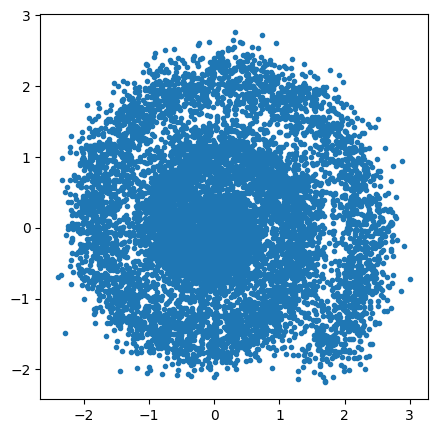

In [88]:
fig = plt.figure(figsize=(5, 5))
x_tn = x_t.cpu().detach().numpy()
plt.scatter(x_tn[:,0], x_tn[:,1], marker=".")
plt.show()



final mean:  tensor([0.0299, 0.0133], dtype=torch.float64, grad_fn=<MeanBackward1>)
final std:  tensor(1.0103, dtype=torch.float64, grad_fn=<StdBackward0>)


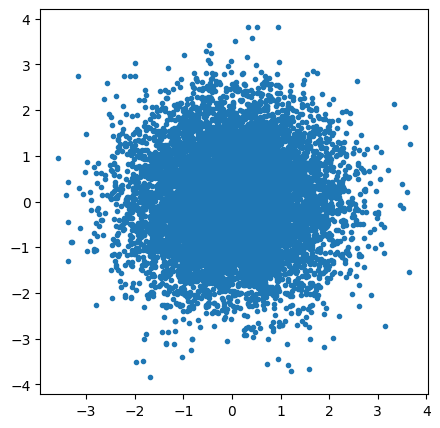

In [83]:

print('final mean: ', torch.mean(x_t, dim=0))
print('final std: ', torch.std(x_t))
#After a given epoch the final distribution should represent the 
#final forward diffusion state (ie. the starting point for going backward)
#we can generate it by using the mean and std of it
noise = torch.randn_like(x_t)
XT = torch.mean(x_t) + torch.std(x_t) * noise #(this is the same as the final xt)
XTn = XT.detach().numpy()
fig = plt.figure(figsize = (5, 5))
plt.scatter(XTn[:, 0], XTn[:,1], marker='.')

mean of var: 1.7296922206878662 max of var: 2.2641959190368652, min of var: 1.2790979146957397
mean of mu: 0.0707196518778801 max of mu: 3.1640191078186035, min of mu: -3.1841118335723877
mean of var: 1.7354170083999634 max of var: 2.43996262550354, min of var: 1.1917800903320312
mean of mu: 0.10699864476919174 max of mu: 4.709750175476074, min of mu: -4.974242210388184
mean of var: 1.7376521825790405 max of var: 2.505429267883301, min of var: 1.1464369297027588
mean of mu: 0.10082623362541199 max of mu: 5.063338279724121, min of mu: -6.092520236968994
mean of var: 1.7383853197097778 max of var: 2.5158586502075195, min of var: 1.1434671878814697
mean of mu: 0.09709273278713226 max of mu: 6.029575347900391, min of mu: -5.9055376052856445
mean of var: 1.7388548851013184 max of var: 2.5518476963043213, min of var: 1.1563940048217773
mean of mu: 0.09932273626327515 max of mu: 5.432521343231201, min of mu: -5.211010932922363
mean of var: 1.7367534637451172 max of var: 2.5285844802856445, mi

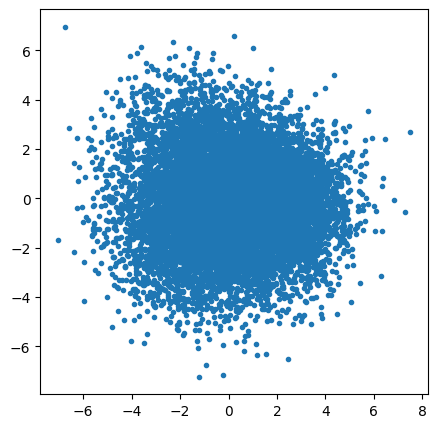

In [90]:
# NOw try to evaluate
#x_t = x_tn
x_t = XT
for i in range(T-1, -1, -1):
    t = (i+1)/T
    t = torch.full(( x_t.shape[0], 1), t)    
    [mu_pred, log_var_pred] = difnet.forward(x_t, t)
    var_pred = torch.exp(log_var_pred)

    #This represents the forward diffusion process.
    #x_t = torch.sqrt(1 - beta_t) * mu_pred + torch.sqrt(beta_t) * var_pred
    #The backwards, because we learn it is a little more straight forward
    noise = torch.randn_like(x_t)
    x_t = mu_pred + torch.sqrt(var_pred + 1e-8) * noise

    print(f"mean of var: {torch.mean(var_pred)} max of var: {torch.max(var_pred)}, min of var: {torch.min(var_pred)}")
    print(f"mean of mu: {torch.mean(mu_pred)} max of mu: {torch.max(mu_pred)}, min of mu: {torch.min(mu_pred)}")
x_tn = x_t.detach().numpy()
fig = plt.figure(figsize = (5, 5))
plt.scatter(x_tn[:, 0], x_tn[:,1], marker='.')
plt.show()
    





